#### Axion Cosmology
<br> Author: Manish Tamta </br>
<br> Dated: July 23, 2024 </br>

In [1]:
## importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

##### Solving the KG equation for scalar field (axion)
<br> $\ddot{\phi} + 3H(t)\dot{\phi} + m^2 \phi = 0$ </br> 
<br> during radiation domination, </br> 
<br> $H(t) = \frac{1}{2t}$ </br>
<br> and, $a(t) \sim t^{1/2}$ </br>
<br> Now, $T \sim \frac{1}{a} \sim t^{-1/2}$ </br>

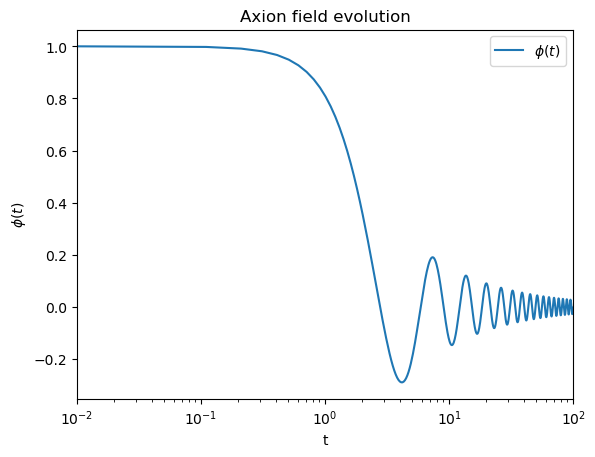

In [2]:
def ode(t, y, m):
    phi, phi_dot = y
    H = 1 / (2*t)
    phi_ddot = -(3*H*phi_dot) - (m**2)*phi

    return [phi_dot, phi_ddot]

## ICs and params
t0 = 1.e-2
t_final = 1.e2
phi0 = 1.0
phi_dot0 = 0.0
m = 1.0

## time points for solving ODE
t_span = (t0, t_final)

## solution
sol = solve_ivp(lambda t, y: ode(t, y, m), t_span, [phi0, phi_dot0], method='RK45', dense_output=True)

## extracting the solution
t = np.linspace(t0, t_final, 1000)
phi = sol.sol(t)[0]  ## phi as a function of t

#plt.figure(figsize=(10, 6))
plt.plot(t, phi, label=r'$\phi(t)$')
plt.xlabel(r't')
plt.ylabel(r'$\phi(t)$')
plt.title('Axion field evolution')
plt.legend()
plt.xscale('log')
plt.xlim(t0, t_final)
plt.show()

<br> Energy density of axion field </br> 
<br> $\rho_{\phi} = \frac{1}{2} \dot{\phi}^2 + \frac{1}{2} m^2 \phi^2$ </br>
<br> during radiation domination, </br> 
<br> $a \sim t^{1/2} \implies \rho_{\phi} \sim a^{-3}$ (behaves like matter as seen in the plot below) </br>

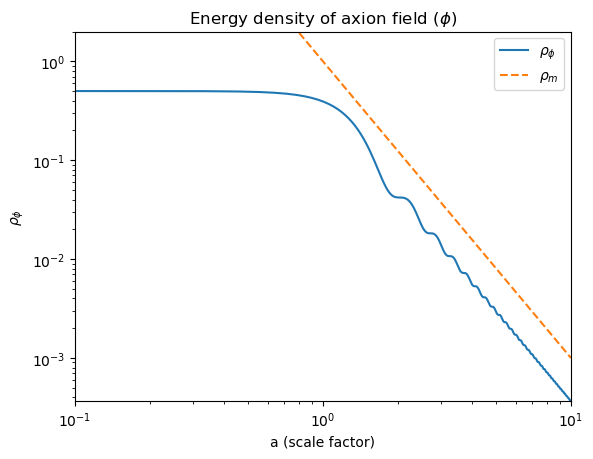

In [3]:
## energy density of axion field

def calculate_rho_phi(phi, phi_dot, m):
    rho_phi = 0.5 * phi_dot**2 + 0.5 * (m**2) * phi**2
    return rho_phi

## extracting the solution of KG equation
t = np.linspace(t0, t_final, 1000)
phi = sol.sol(t)[0]
phi_dot = sol.sol(t)[1]
m = 1.0

## expressing in terms of scale factor
a = np.sqrt(t)

# Calculate rho_phi
rho_phi = calculate_rho_phi(phi, phi_dot, m)
rho_matter = a**(-3)

#plt.figure(figsize=(10, 6))
plt.plot(a, rho_phi, '-', label=r'$\rho_{\phi}$')
plt.plot(a, rho_matter, '--', label=r'$\rho_{m}$')
plt.xlabel(r'a (scale factor)')
plt.ylabel(r'$\rho_{\phi}$')
plt.title(r'Energy density of axion field ($\phi$)')
plt.legend()
#plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xlim(min(a), max(a))
plt.ylim(min(rho_phi), 2)
plt.show()

<br> Computing $t_{osc}$ or $T_{osc}$ </br>
<br> $3H(t_{osc}) = m_{\phi}$ </br>
<br> during radiation domination, $H(t) = \frac{1}{2t}$ and $T \sim \frac{1}{a} \sim t^{-1/2}$ </br>
<br> $\implies \frac{3}{2t} = m_{\phi}$ </br>

t_osc = 1.4999999999999998
a(t_osc) = 1.224744871391589


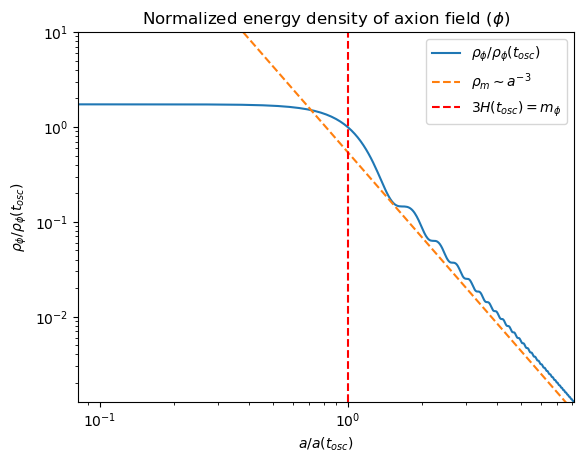

In [4]:
## normalized energy density of axion field

from scipy.optimize import fsolve

## finding t_osc such that 3*H(t_osc) = m_phi
def find_t_osc(m_phi):
    def equation(t):
        return 3 / (2*t) - m_phi
    t_guess = 1.0
    t_osc = fsolve(equation, t_guess)[0]
    return t_osc


## normalized rho_phi
def normalize_rho_phi(rho_phi, rho_phi_tosc):
    return rho_phi / rho_phi_tosc


t_osc = find_t_osc(m) ## m is defined in the above cell (m = 1)
print(f"t_osc = {t_osc}")

## rho_phi at t = t_osc
rho_phi_tosc = np.interp(t_osc, t, rho_phi)

## a at t = t_osc
a_tosc = np.sqrt(t_osc)
print(f"a(t_osc) = {a_tosc}")

rho_phi_normalized = normalize_rho_phi(rho_phi, rho_phi_tosc)
a_normalized = a / a_tosc
rho_matter = a**(-3)

#plt.figure(figsize=(10, 6))
plt.plot(a_normalized, rho_phi_normalized, label=r'$\rho_\phi / \rho_{\phi}(t_{osc})$')
plt.plot(a_normalized, rho_matter, '--', label=r'$\rho_{m} \sim a^{-3}$')
plt.axvline(x=1, color='r', linestyle='--', label=r'$3H(t_{osc}) = m_{\phi}$')
plt.xlabel(r'$a / a(t_{osc})$')
plt.ylabel(r'$\rho_\phi / \rho_{\phi}(t_{osc})$')
plt.title(r'Normalized energy density of axion field ($\phi$)')
plt.legend()
#plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xlim(min(a_normalized), max(a_normalized))
plt.ylim(min(rho_phi_normalized), 10)
plt.show()

##### Equation of state parameter w
<br> $P = w \rho \implies w = P/\rho$ </br>
<br> from scalar field dynamics, </br>
<br> $P = \frac{\dot{\phi}^2}{2} - V({\phi})$ </br>
<br> $\rho = \frac{\dot{\phi}^2}{2} + V({\phi})$ </br>
<br> where $V({\phi}) = \frac{1}{2} m^2 \phi^2$ </br>

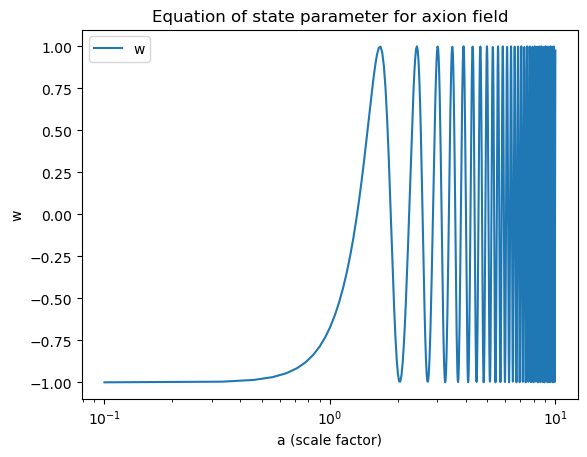

In [5]:
def calculate_P_rho(phi, phi_dot, m):
    V = 0.5 * m**2 * phi**2 ## scalar potential
    P = 0.5 * phi_dot**2 - V
    rho = 0.5 * phi_dot**2 + V
    return P, rho

def calculate_w(P, rho):
    return P / rho

P, rho = calculate_P_rho(phi, phi_dot, m)

## equation of state parameter w
w = calculate_w(P, rho)

#plt.figure(figsize=(10, 6))
plt.plot(a, w, label=r'w')
plt.xlabel(r'a (scale factor)')
plt.ylabel(r'w')
plt.title('Equation of state parameter for axion field')
plt.legend()
#plt.grid(True)
plt.xscale('log')
plt.show()

<br> Equation of state w = -1 tells us that axion behaves like dark energy in the early universe.</br>
<br> At late time during the radiation domination w becomes 0 i.e. axion field behaves as dark matter.</br>